In [1]:
import os

os.getcwd()

'/home/cseadmin/undergrad1/dz/GISCUP2021/model'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

link_id_dict={}

def add_to_dict(row):
    global link_id_dict
    
    link_id=int(row["link_id"])
    link_time=row["link_time"]
    link_cur_status=int(row["link_current_status"])
    link_arr_status=int(row["link_arrival_status"])

    if not link_id in link_id_dict:
        link_id_dict[link_id]=[[link_time, [link_cur_status, link_arr_status]]]
    else:
        link_id_dict[link_id].append([link_time, [link_cur_status, link_arr_status]])

In [3]:
# n=200000

# with open("../data/train/20200801.txt", "r") as train_data:
#     for _ in range(n):
#         line=train_data.readline().split(";;")
#         if len(line)>1:
#             links=line[1].split(" ")
#             for link in links:
#                 temp=link.split(",")
#                 temp[0]=temp[0].split(":")

#                 link_id=int(temp[0][0])
#                 link_time=float(temp[0][1])
#                 link_cur_status=int(temp[2])
#                 link_arr_status=int(temp[3])

#                 if not link_id in link_id_dict:
#                     link_id_dict[link_id]=[[link_time, [link_cur_status, link_arr_status]]]
#                 else:
#                     link_id_dict[link_id].append([link_time, [link_cur_status, link_arr_status]])

file_number=5
count=0
filenames=os.listdir("../data/train/train_link")[1:] # skip 20200803
for f in filenames:
    df=pd.read_csv(f"../data/train/train_link/{f}")
    df=df.dropna()
    df.apply(add_to_dict, axis=1)

    count+=1
    if count>=file_number:
        break

len(link_id_dict)

406856

In [4]:
keys=[]
lens=[]

for key in link_id_dict.keys():
    if len(link_id_dict[key])>1000:
        keys.append(key)
        lens.append(len(link_id_dict[key]))

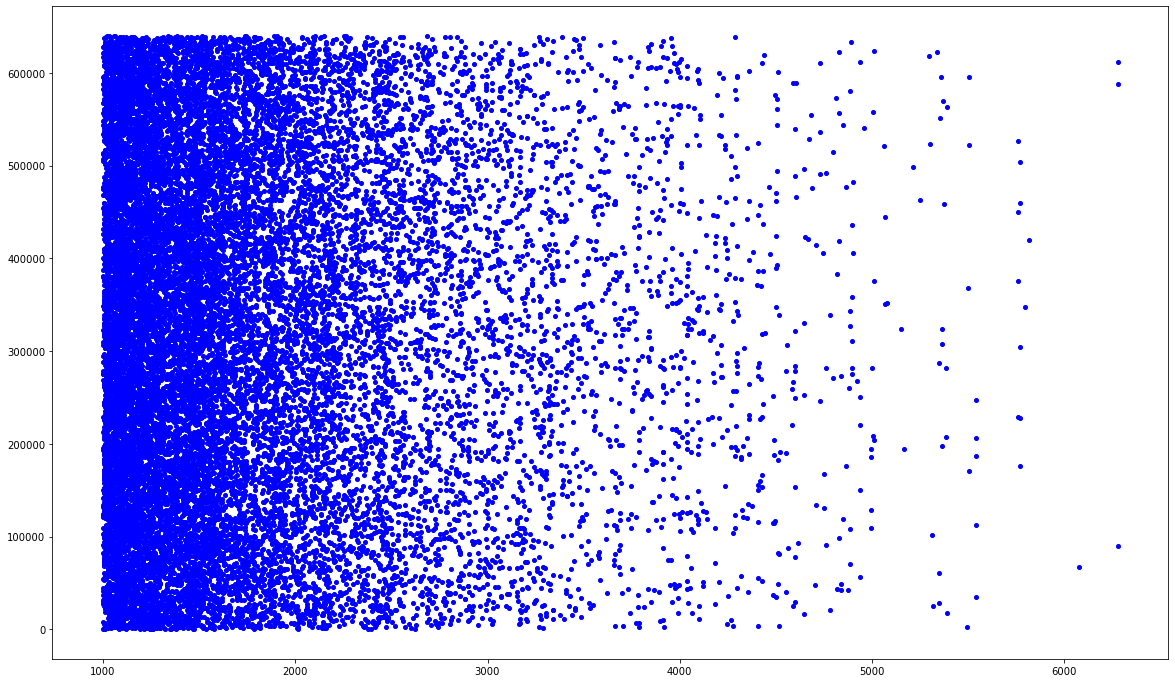

In [5]:
plt.figure(figsize=(20, 12))
plt.plot(lens, keys, "bo", ms=4)
plt.show()

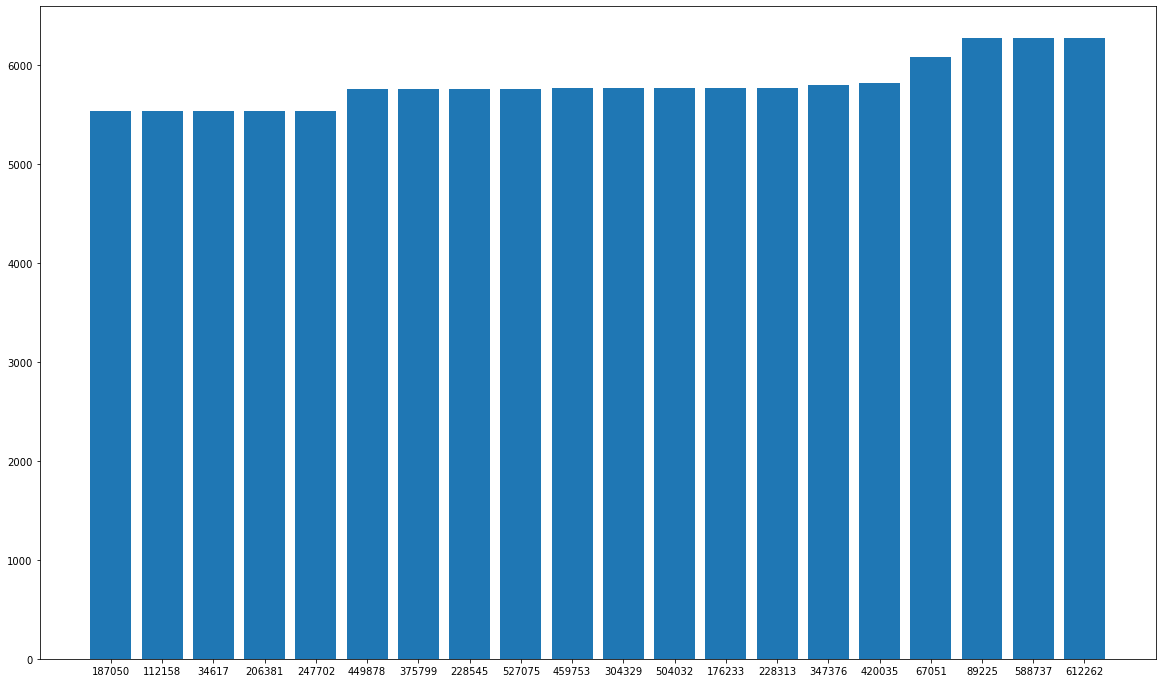

In [6]:
keys=np.array(keys)
lens=np.array(lens)

sorted_index=np.argsort(lens)
sorted_lens=lens[sorted_index]
sorted_keys=keys[sorted_index]

plt.figure(figsize=(20, 12))
plt.bar(list(map(str, sorted_keys[-20:])), sorted_lens[-20:])
plt.show()

In [7]:
max_key=-1
max_len=-1

for key, value in link_id_dict.items():
    if len(value)>max_len:
        max_len=len(value)
        max_key=key

max_key, max_len

(612262, 6278)

In [8]:
link_id_dict[max_key][:10]

[[10.4651, [1.0, 1.0]],
 [11.8421, [1.0, 1.0]],
 [10.0, [1.0, 1.0]],
 [9.7826, [1.0, 1.0]],
 [9.1837, [1.0, 1.0]],
 [10.2273, [1.0, 1.0]],
 [9.5745, [1.0, 1.0]],
 [8.6538, [1.0, 1.0]],
 [9.1837, [1.0, 1.0]],
 [12.1622, [1.0, 1.0]]]

In [9]:
x_time=[]
y_cur_status=[]
y_arr_status=[]

for entry in link_id_dict[max_key]:
    x_time.append(entry[0])
    y_cur_status.append(entry[1][0])
    y_arr_status.append(entry[1][1])

x_time=np.array(x_time)
y_cur_status=np.array(y_cur_status)
y_arr_status=np.array(y_arr_status)
;

''

k=5

01234-time 拟合

[2664  257  213 2335  809]
[[11.90560424  0.9984985 ]
 [31.30321751  1.95719844]
 [22.41569155  1.29107981]
 [ 9.88212797  0.99914347]
 [14.15187491  1.00988875]]


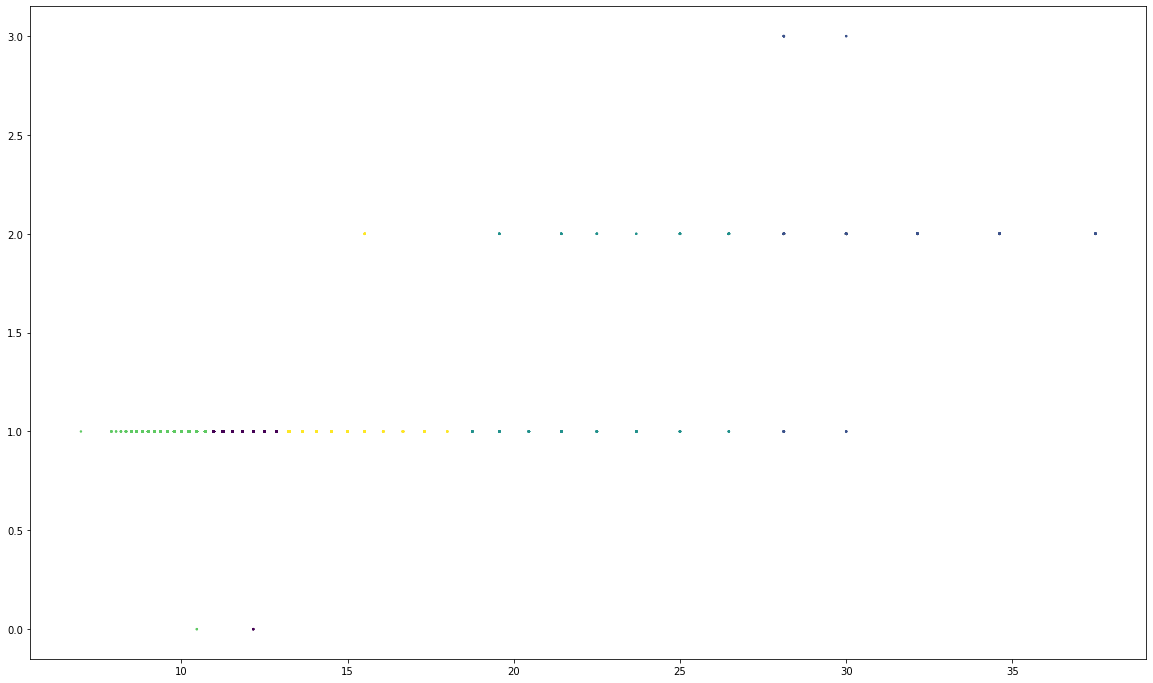

[2335  292  182 1142 2327]
[[ 9.88212797  1.00085653]
 [30.72396541  1.69863014]
 [21.5388533   1.23626374]
 [13.75631305  1.04728546]
 [11.76780705  1.01160292]]


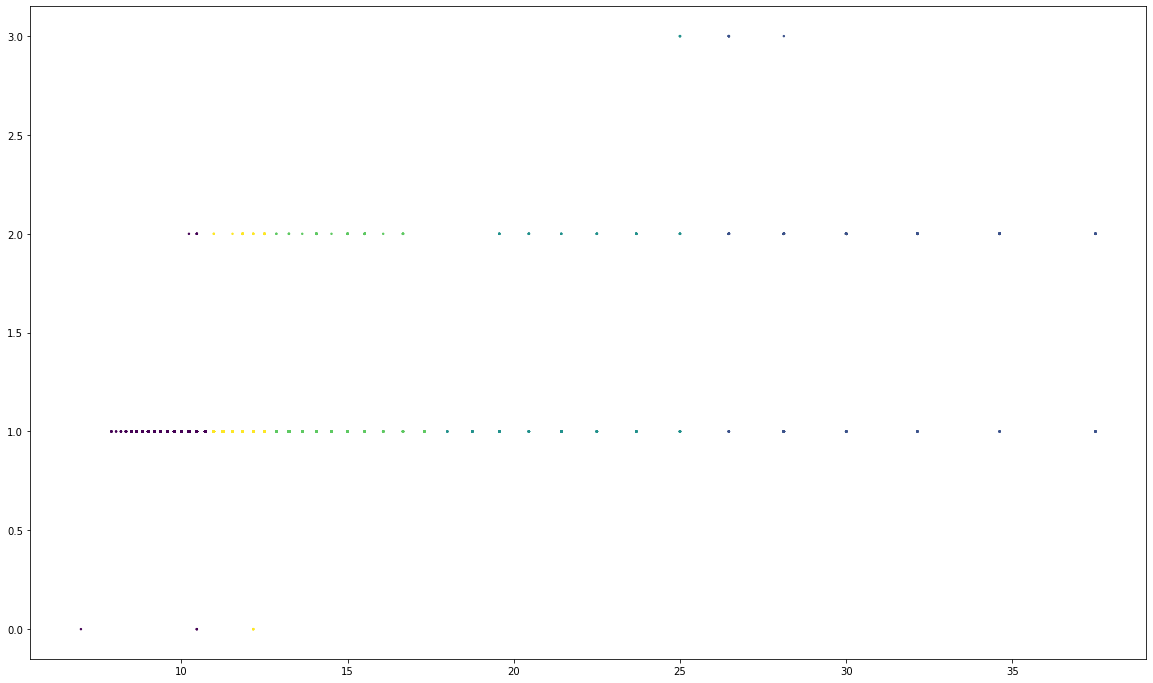

In [23]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)

kmeans_input=np.vstack((x_time, y_cur_status)).T
kmeans.fit(kmeans_input)
labels=kmeans.labels_
print(np.bincount(labels))
print(kmeans.cluster_centers_)
plt.figure(figsize=(20, 12))
plt.scatter(kmeans_input[:, 0], kmeans_input[:, 1], c=labels, s=2)
plt.show()

kmeans_input=np.vstack((x_time, y_arr_status)).T
kmeans.fit(kmeans_input)
labels=kmeans.labels_
print(np.bincount(labels))
print(kmeans.cluster_centers_)
plt.figure(figsize=(20, 12))
plt.scatter(kmeans_input[:, 0], kmeans_input[:, 1], c=labels, s=2)
plt.show()

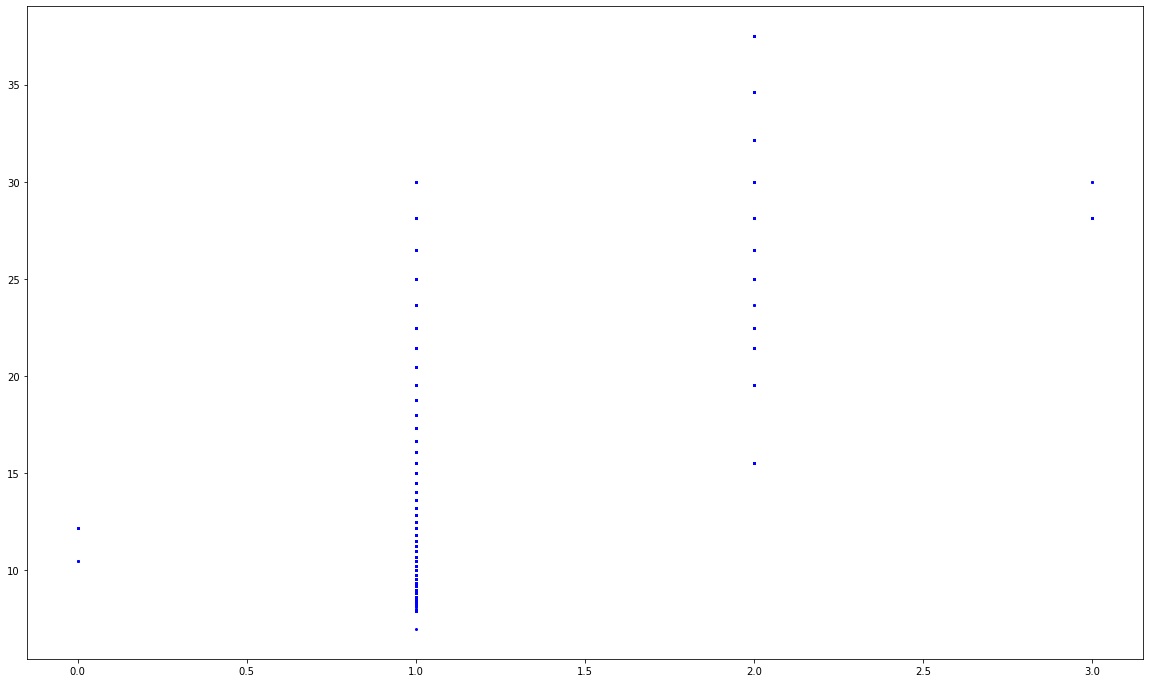

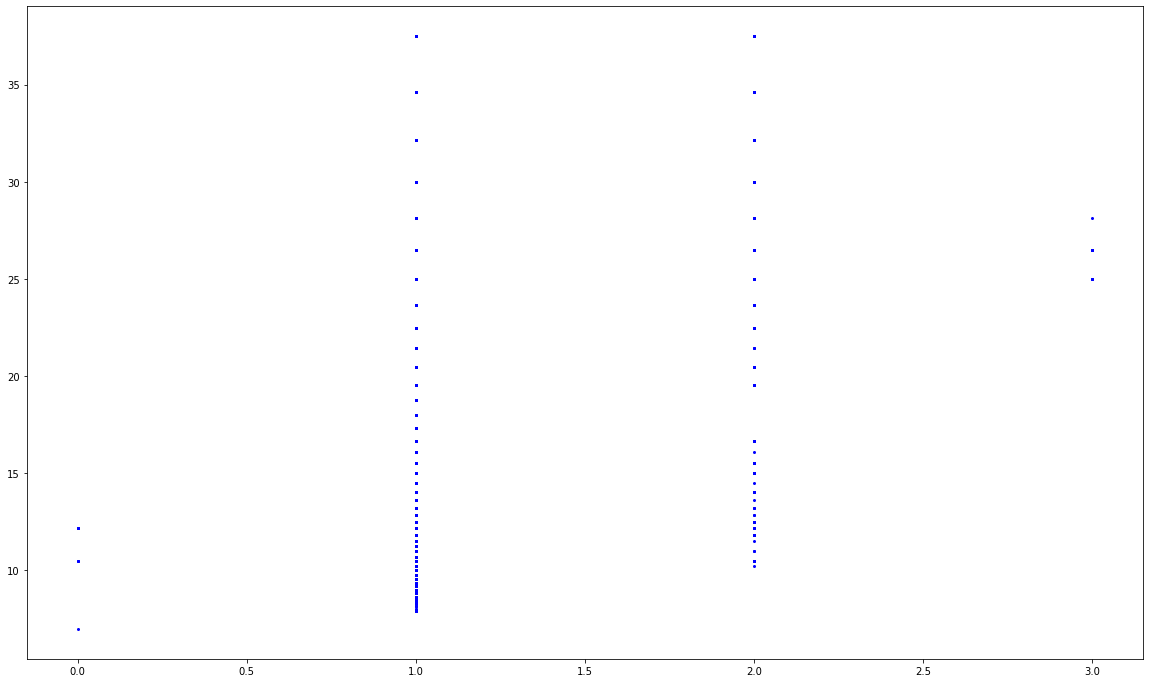

In [12]:
plt.figure(figsize=(20, 12))
plt.plot(y_cur_status, x_time, "bo", ms=2)
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(y_arr_status, x_time, "bo", ms=2)
plt.show()

DT

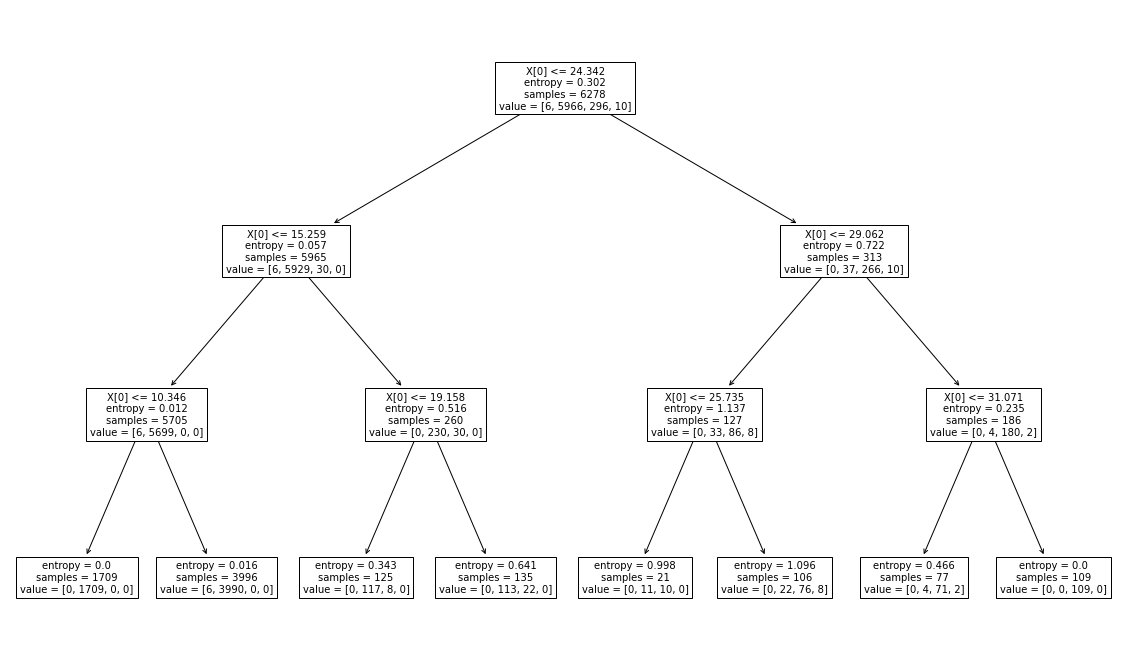

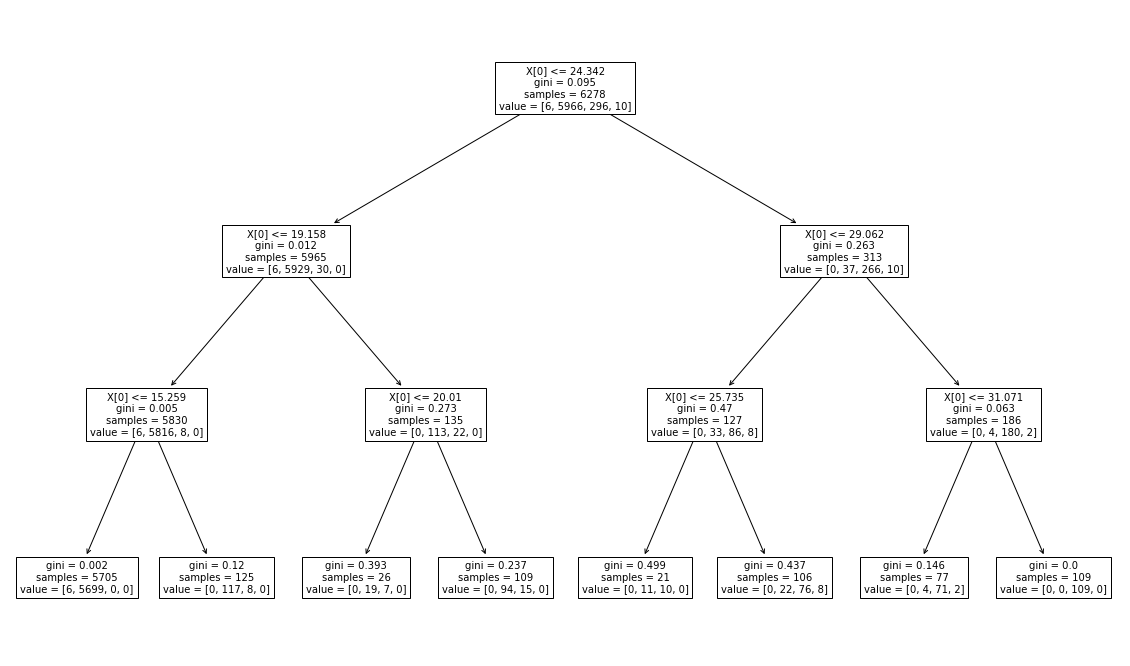

In [24]:
from sklearn import tree
x_time_input=x_time.reshape(-1, 1)

clf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf=clf.fit(x_time_input, y_cur_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

clf=tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
clf=clf.fit(x_time_input, y_cur_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

plt.show()

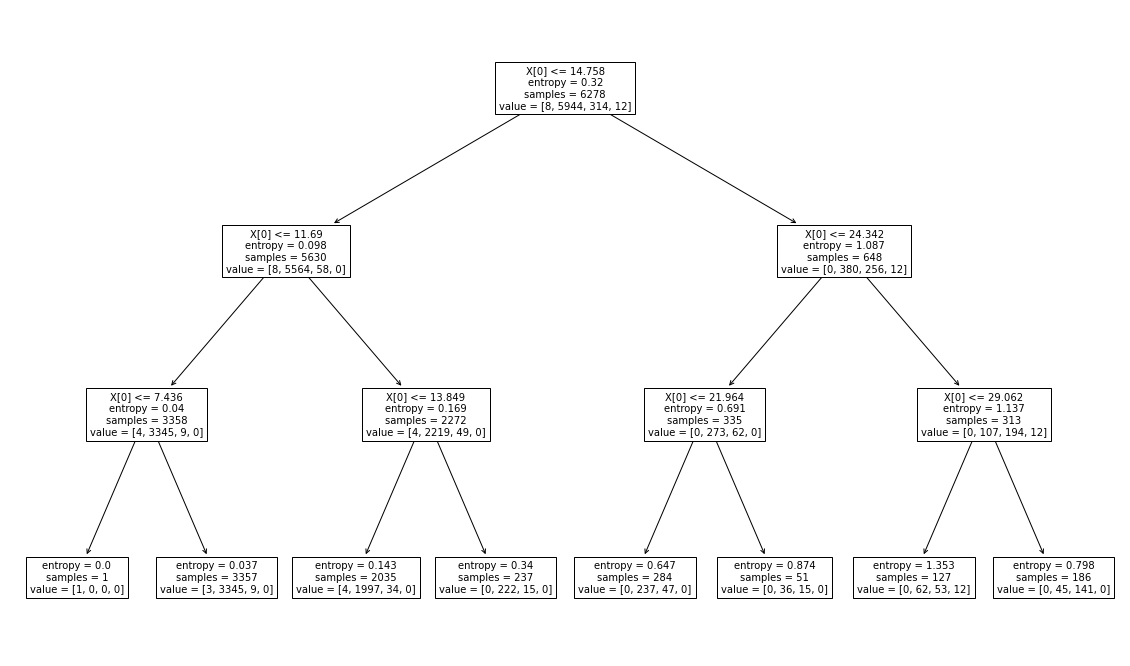

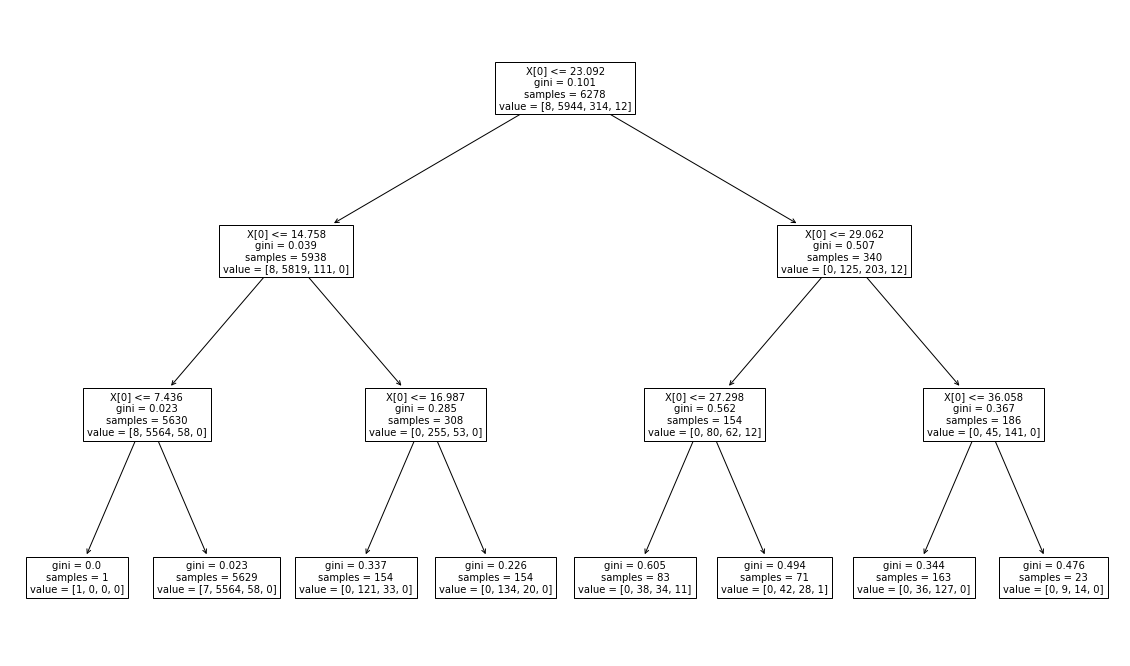

In [25]:
clf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf=clf.fit(x_time_input, y_arr_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

clf=tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
clf=clf.fit(x_time_input, y_arr_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

plt.show()